In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from brainflow.data_filter import DataFilter

In [2]:
# main directory
main_dir = os.getcwd()
# eeg data directory
eeg_dir = os.path.join(main_dir, "eeg_data")
# test save dir
save_dir = os.path.join(main_dir, "refiltered")

MI_CLASSES = ["left", "right", "none"]

samp_freq = 250
num_eeg_channels = 8

In [8]:
sos = signal.butter(N=4, Wn=[71, 91], btype="bandpass", analog=False, output="sos", fs=samp_freq)  # bandpass filter

for mi_class in MI_CLASSES:
    mi_class_dir = os.path.join(eeg_dir, mi_class)
    for filename in os.listdir(mi_class_dir):
        if "filtered" in filename:
            eeg_data = np.loadtxt(os.path.join(mi_class_dir, filename), delimiter=',')  # (1250, 8) eeg data

            eeg_channel_data = []
            for i in range(num_eeg_channels):
                eeg_i = eeg_data[:, i]
                eeg_i_bp = signal.sosfilt(sos, eeg_i)
                eeg_channel_data.append(eeg_i_bp)

            filtered_eeg = np.asarray(eeg_channel_data)

            eeg_dataT = np.transpose(eeg_data)  # (8, 1250) eeg data

            old_filename = filename.split("_filtered.txt")
            filt_filename = old_filename[0] + "_refiltered" + ".txt"
            os.chdir(save_dir)
            DataFilter.write_file(eeg_dataT, filename, 'w')

os.chdir(main_dir)



In [10]:
np.shape(filtered_eeg)

(8, 1250)

In [12]:
DataFilter.write_file(filtered_eeg, "test.txt", 'w')

Creating RawArray with float64 data, n_channels=8, n_times=1150
    Range : 0 ... 1149 =      0.000 ...     4.596 secs
Ready.
Effective window size : 4.600 (s)


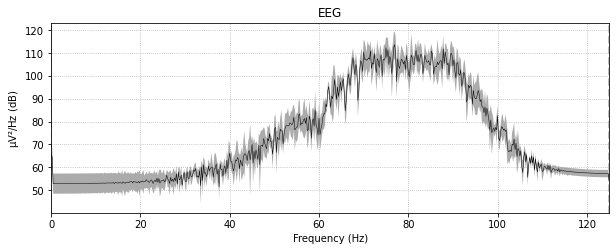

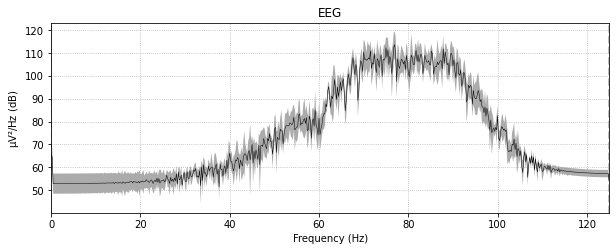

In [18]:
import mne
# create the info structure needed by MNE
channel_names = ["1", "2", "3", "4", "5", "6", "7", "8"]
info = mne.create_info(channel_names, samp_freq, ch_types='eeg')
# create Raw object
raw = mne.io.RawArray(filtered_eeg[:, 100:], info)
# plot PSD
raw.plot_psd(fmax=samp_freq/2, average=True)

Creating RawArray with float64 data, n_channels=8, n_times=1250
    Range : 0 ... 1249 =      0.000 ...     4.996 secs
Ready.
Effective window size : 5.000 (s)


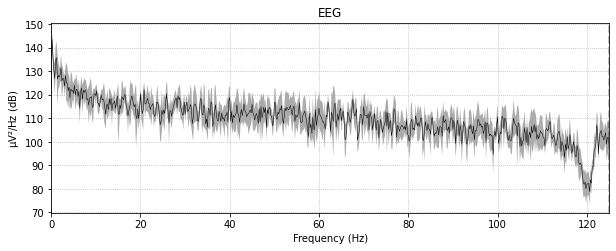

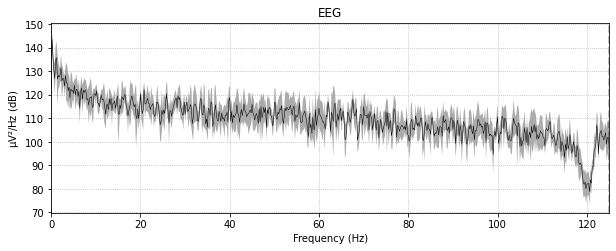

In [16]:
import mne
# create the info structure needed by MNE
channel_names = ["1", "2", "3", "4", "5", "6", "7", "8"]
info = mne.create_info(channel_names, samp_freq, ch_types='eeg')
# create Raw object
raw = mne.io.RawArray(np.transpose(eeg_data), info)
# plot PSD
raw.plot_psd(fmax=samp_freq/2, average=True)